# TITANIC

This project corresponds to one of the most popular datasets in kaggle. The objective of the project is to perform different machine learning algorithms compare its accuracies and conclude with the best one.

The sections treated are the following:


*   Load libraries.
*   Load the data.
*   Explore the data.
*   Visualize the data to obtain insights.
*   Preprocess the data.
*   Featuring ingineering.
*   Split the data.
*   Model Selection.
*   Choose a model.
*   Conclusions.



# Libraries.

In [1]:
# Data Reading and Data Wrangling.
from google.colab import files
import pandas as pd
import numpy as np

# Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Data Preprocessing.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# Data Splitting.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# ML Models.
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.linear_model import SGDClassifier

# Ensembel Methods.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import logging
logging.getLogger('lightgbm').setLevel(logging.ERROR)

# Model Evaluation.
from sklearn.metrics import accuracy_score, confusion_matrix

# Fine-Tune the Model.
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Load the data.

In [ ]:
df_train = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")

# Explore the data.

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


At first sight it is clear that at least one column has missing values, while other two are categorical. Let's recall the target column is "Survived" which is missing in the data test set.

For this reason I'll split the train set and use the test set to make predictions.

In [10]:
print("The size of the train set is: ", df_train.shape)
print("The size of the test set is: ", df_test.shape)

The size of the train set is:  (891, 12)
The size of the test set is:  (418, 11)


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There is two options to tackle the missing values of the age column:


1.   Fill those values with the mean.
2.   Fill those values with the median.

In both cases the values are near from each other.

On the other hand, the cabin column has too many missing values that traying to fill it with some measure is not worth it. And for the embarked column due to its low missing values the best to do is filling it with some random value within its categories.

Before do that, let's visualize the data.




# Data Visualization

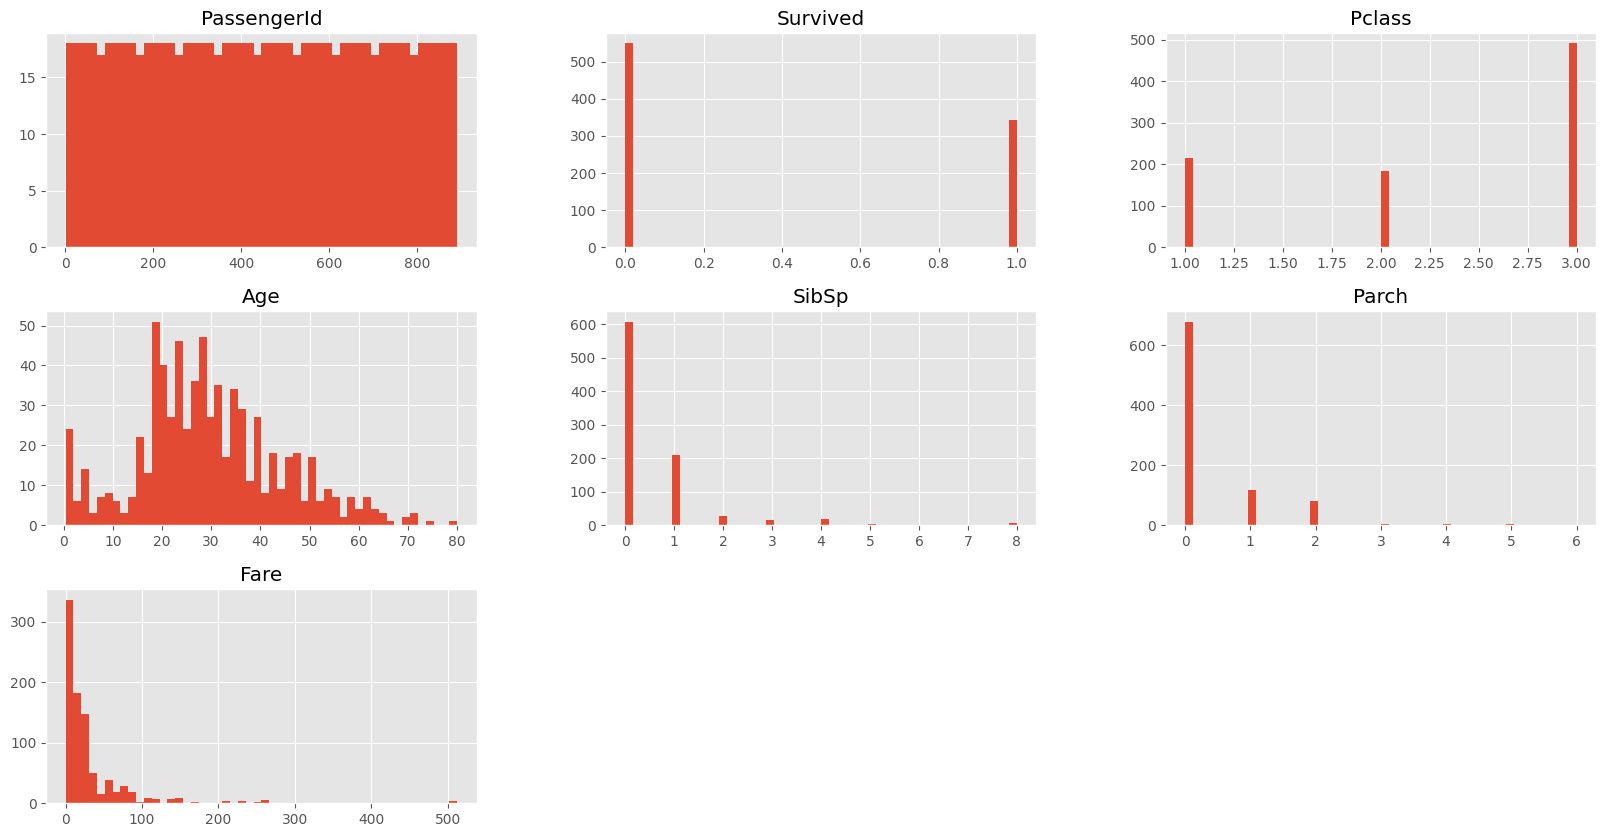

In [15]:
df_train.hist(bins=50, figsize=(20,10))
plt.show()

First impressions of the data:


1.   Most of the people didn't make it.
2.   Most of the people were lower class.
3.   Most of the people were between 20 and 30 years old.
4.   Most of the people didn't have relatives inboard.

Now let's see the categorical columns.



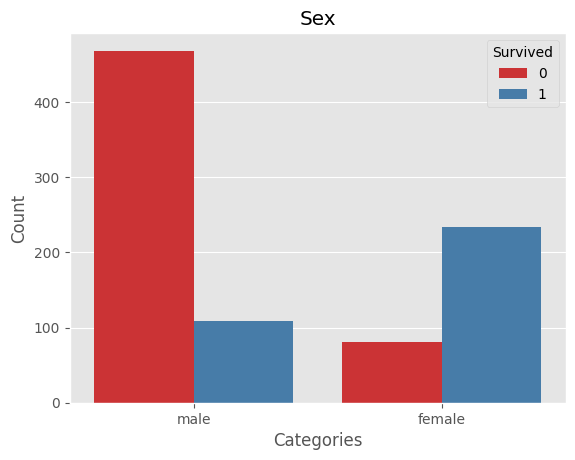

In [16]:
sns.countplot(data=df_train, x="Sex", palette="Set1", hue='Survived')
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Sex")
plt.show()

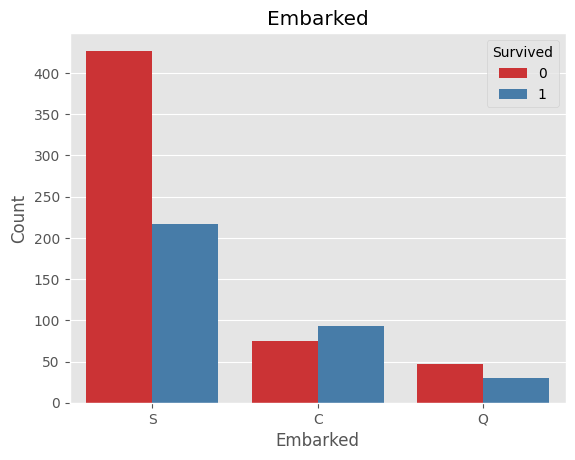

In [17]:
sns.countplot(data=df_train, x="Embarked", palette="Set1", hue='Survived')
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Embarked")

plt.show()

The categorical values show:


1.   Most of the passenger were Male.
2.   Most of the passenger embarked in Southampton.

Also it is worth showing an age boxpplot of the passengers and then proceed with the data preprocessing.



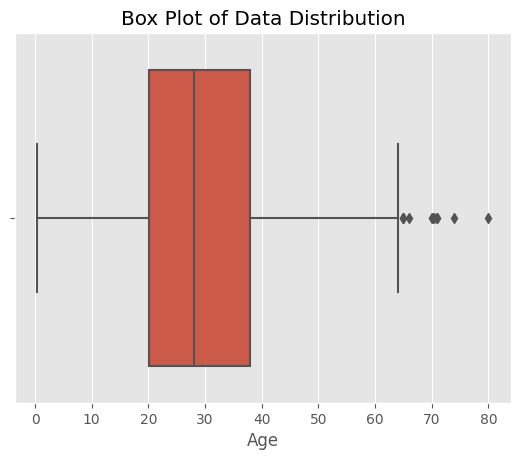

In [18]:
sns.boxplot(x=df_train['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Data Distribution')

plt.show()

# Data preprocessing.

  I define my features and my target.

In [19]:
features = [
    "Pclass",
    "Sex",
    "Age",
    "SibParch",
    "Fare",
    "Embarked"
]

dont_need = [
    "PassengerId",
    "Name",
    "Ticket",
    "Cabin"
]

target = "Survived"

In [20]:
data_train = df_train.drop(dont_need, axis=1)
data_test =df_test.drop(dont_need, axis=1)

In [21]:
data_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [22]:
data_test.head(0)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


Now I treat the mssing values.

In [23]:
data_train["Age"].fillna(data_train["Age"].median(), inplace=True)
data_train["Embarked"].ffill(inplace=True)
data_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
data_test["Age"].fillna(data_test["Age"].median(), inplace=True)
data_test["Fare"].bfill(inplace=True)
data_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Let's get the categorical features in a better format for the algorithms.

In [25]:
data_train = data_train.replace({'Sex':{"male":1,"female":2}, 'Embarked':{'S':1,'C':2,'Q':3}})
data_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,2,38.0,1,0,71.2833,2
2,1,3,2,26.0,0,0,7.9250,1
3,1,1,2,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [26]:
data_test = data_test.replace({'Sex':{"male":1,"female":2}, 'Embarked':{'S':1,'C':2,'Q':3}})
data_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,2,47.0,1,0,7.0000,1


Another way to do the previous is using LabelEncoder from sklearn.

In [27]:
label_encoder = LabelEncoder()

# Feature engineering.

For feature engineering, the following are some posibilities:


*   Smash the SibSp and Parch columns together.
*   Normalize age and fare.

In [28]:
train_cat0 = data_train.copy()  # No changes.
train_cat1 = data_train.copy()  # New column "TRelatives", and delete "SibSp" and "Parch".
train_cat2 = data_train.copy()  # "Age" and "Fare" are normalized.
train_cat3 = data_train.copy()  # Combination of cat1 and cat2.

test_cat0 = data_test.copy()
test_cat1 = data_test.copy()
test_cat2 = data_test.copy()
test_cst3 = data_test.copy()

Let's create the first data set with only the combination of "SibSp" and "Parch".

In [29]:
train_cat1["TRelatives"] = train_cat1["SibSp"] + train_cat1["Parch"]
train_cat1.drop(["SibSp", "Parch"], axis=1, inplace=True)
train_cat1.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,TRelatives
0,0,3,1,22.0,7.2500,1,1
1,1,1,2,38.0,71.2833,2,1


Now the data set with the "Age" and "Fare" normalized.

In [30]:
scaler = MinMaxScaler(feature_range=(0,1))

In [31]:
train_cat2["Age"] = scaler.fit_transform(train_cat2[["Age"]])
train_cat2["Fare"] = scaler.fit_transform(train_cat2[["Fare"]])
train_cat2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,1
1,1,1,2,0.472229,1,0,0.139136,2


And finally a combination of both.

In [32]:
train_cat3["TRelatives"] = train_cat3["SibSp"] + train_cat3["Parch"]
train_cat3.drop(["SibSp", "Parch"], axis=1, inplace=True)

train_cat2["Age"] = scaler.fit_transform(train_cat3[["Age"]])
train_cat3["Fare"] = scaler.fit_transform(train_cat3[["Fare"]])

train_cat3.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,TRelatives
0,0,3,1,22.0,0.014151,1,1
1,1,1,2,38.0,0.139136,2,1


# Model Selection

We initialize the machine learning models.

In [33]:
# Logistic Regression
lr = LogisticRegression(random_state=5)

# Decisicon Tree Classifier
dtc = DecisionTreeClassifier(random_state=5)

# Suport Vector Classifier
svc = SVC(kernel='linear', C=1.0, random_state=5)

# K-Neighbors Classifier
knc = KNeighborsClassifier(n_neighbors=4)

# Naive-Bayes
nb = GaussianNB()

# Extreme Gradient Boosting
from xgboost import XGBClassifier
xgb = xgb.XGBClassifier()

# Stochastic Gradient Descendent
sgd = SGDClassifier(loss="log_loss", random_state=5)

In [34]:
models = [lr, dtc, svc, knc, nb, xgb, sgd]
models_name = ['LR ', 'DTC', 'SVC', 'KNC','NB ', 'EGB', 'SGD' ]

In [35]:
data_v = [train_cat0, train_cat1, train_cat2, train_cat3]

In [36]:
pred = []

for version in range(4):
  X = data_v[version].drop('Survived', axis=1)
  y = data_v[version]['Survived']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

  print('\n')
  print(f'================== Data Category {version} ================== ')
  sum_acc=0
  for model in range(7):
    models[model].fit(X_train,y_train)
    y_pred = models[model].predict(X_test)
    accuracy =  accuracy_score(y_test, y_pred)
    sum_acc += accuracy
    print(f'=== Model === : {models_name[model]} === Accuracy === : {accuracy:.4f}\n')
    pred.append(y_pred)
    mean_acc = sum_acc/7
  print("------------------------------------------------------")
  print(f'================== Mean accuracy === : {mean_acc:.4f}')



================== Data Category 0 ================== 
=== Model === : LR  === Accuracy === : 0.8156

=== Model === : DTC === Accuracy === : 0.7709

=== Model === : SVC === Accuracy === : 0.7933

=== Model === : KNC === Accuracy === : 0.7318

=== Model === : NB  === Accuracy === : 0.8324

=== Model === : EGB === Accuracy === : 0.8268

=== Model === : SGD === Accuracy === : 0.5084

------------------------------------------------------
================== Mean accuracy === : 0.7542


================== Data Category 1 ================== 
=== Model === : LR  === Accuracy === : 0.8101

=== Model === : DTC === Accuracy === : 0.8045

=== Model === : SVC === Accuracy === : 0.7933

=== Model === : KNC === Accuracy === : 0.7374

=== Model === : NB  === Accuracy === : 0.8380

=== Model === : EGB === Accuracy === : 0.8156

=== Model === : SGD === Accuracy === : 0.7486

------------------------------------------------------
================== Mean accuracy === : 0.7925


================== Data 

In [37]:
for version in range(4):
  X = data_v[version].drop('Survived', axis=1)
  y = data_v[version]['Survived']

  split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=5)
  for train_index, test_index in split.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

  print('\n')
  print(f'================== Data Category {version} ================== ')
  sum_acc=0
  for model in range(7):
    models[model].fit(X_train,y_train)
    y_pred = models[model].predict(X_test)
    accuracy =  accuracy_score(y_test, y_pred)
    sum_acc += accuracy
    print(f'=== Model === : {models_name[model]} === Accuracy === : {accuracy:.4f}\n')
    pred.append(y_pred)
    mean_acc = sum_acc/7
  print("------------------------------------------------------")
  print(f'================== Mean accuracy === : {mean_acc:.4f}')



================== Data Category 0 ================== 
=== Model === : LR  === Accuracy === : 0.7933

=== Model === : DTC === Accuracy === : 0.7765

=== Model === : SVC === Accuracy === : 0.7486

=== Model === : KNC === Accuracy === : 0.6872

=== Model === : NB  === Accuracy === : 0.7933

=== Model === : EGB === Accuracy === : 0.7989

=== Model === : SGD === Accuracy === : 0.7765

------------------------------------------------------
================== Mean accuracy === : 0.7678


================== Data Category 1 ================== 
=== Model === : LR  === Accuracy === : 0.8101

=== Model === : DTC === Accuracy === : 0.7877

=== Model === : SVC === Accuracy === : 0.7486

=== Model === : KNC === Accuracy === : 0.6760

=== Model === : NB  === Accuracy === : 0.8045

=== Model === : EGB === Accuracy === : 0.8045

=== Model === : SGD === Accuracy === : 0.7821

------------------------------------------------------
================== Mean accuracy === : 0.7733


================== Data 

## Ensemble Methods

**Voting Classifier**

For voting classfier I use the dat set category 1 and ensemble logistic regression, naive-bayes and extreme gradient descent algorithms.

In [38]:
def voting_classifier(dataset, voting:str):
  if voting=="soft":
      X = dataset.drop('Survived', axis=1)
      y = dataset['Survived']

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

      vc = VotingClassifier(estimators=[
          ('LR', lr),
          ('NB', nb),
          ('XGB', xgb),
      ], voting='soft', )

      vc.fit(X_train, y_train)
      y_pred = vc.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)

      print('=== Simple Splitting ===')
      print(f'== Votining Soft == Accuracy == : {accuracy:.4f}\n')

      X = dataset.drop('Survived', axis=1)
      y = dataset['Survived']

      split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=5)
      for train_index, test_index in split.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

      vc = VotingClassifier(estimators=[
          ('LR', lr),
          ('NB', nb),
          ('XGB', xgb),
      ], voting='soft', )

      vc.fit(X_train, y_train)
      y_pred = vc.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)
      print('=== Stratified Splitting ===')
      print(f'== Votining Soft == Accuracy == : {accuracy:.4f}')

  else:
    X = dataset.drop('Survived', axis=1)
    y = dataset['Survived']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

    vc = VotingClassifier(estimators=[
          ('LR', lr),
          ('NB', nb),
          ('XGB', xgb),
    ], voting='hard', )

    vc.fit(X_train, y_train)
    y_pred = vc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print('=== Simple Splitting ===')
    print(f'== Votining Hard == Accuracy == : {accuracy:.4f}\n')

    X = dataset.drop('Survived', axis=1)
    y = dataset['Survived']

    split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=5)
    for train_index, test_index in split.split(X, y):

      X_train, X_test = X.loc[train_index], X.loc[test_index]
      y_train, y_test = y.loc[train_index], y.loc[test_index]

    vc = VotingClassifier(estimators=[
          ('LR', lr),
          ('NB', nb),
          ('XGB', xgb),
    ], voting='hard', )

    vc.fit(X_train, y_train)
    y_pred = vc.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('=== Stratified Splitting ===')
    print(f'== Votining Hard == Accuracy == : {accuracy:.4f}')

In [39]:
for i in range(4):
  print(f'\nData set category {i}')
  print('----------------------')
  voting_classifier(data_v[i],"soft")


Data set category 0
----------------------
=== Simple Splitting ===
== Votining Soft == Accuracy == : 0.8492

=== Stratified Splitting ===
== Votining Soft == Accuracy == : 0.8436

Data set category 1
----------------------
=== Simple Splitting ===
== Votining Soft == Accuracy == : 0.8603

=== Stratified Splitting ===
== Votining Soft == Accuracy == : 0.8212

Data set category 2
----------------------
=== Simple Splitting ===
== Votining Soft == Accuracy == : 0.8547

=== Stratified Splitting ===
== Votining Soft == Accuracy == : 0.8324

Data set category 3
----------------------
=== Simple Splitting ===
== Votining Soft == Accuracy == : 0.8603

=== Stratified Splitting ===
== Votining Soft == Accuracy == : 0.8212


In [40]:
for i in range(4):
  print(f'\nData set category {i}')
  print('----------------------')
  voting_classifier(data_v[i],"hard")


Data set category 0
----------------------
=== Simple Splitting ===
== Votining Hard == Accuracy == : 0.8492

=== Stratified Splitting ===
== Votining Hard == Accuracy == : 0.7989

Data set category 1
----------------------
=== Simple Splitting ===
== Votining Hard == Accuracy == : 0.8436

=== Stratified Splitting ===
== Votining Hard == Accuracy == : 0.8101

Data set category 2
----------------------
=== Simple Splitting ===
== Votining Hard == Accuracy == : 0.8380

=== Stratified Splitting ===
== Votining Hard == Accuracy == : 0.7933

Data set category 3
----------------------
=== Simple Splitting ===
== Votining Hard == Accuracy == : 0.8436

=== Stratified Splitting ===
== Votining Hard == Accuracy == : 0.8045


In [41]:
for dataset in data_v:
  X = dataset.drop('Survived', axis=1)
  y = dataset['Survived']

  vc = VotingClassifier(estimators=[
            ('LR', lr),
            ('NB', nb),
            ('XGB', xgb),
        ], voting='soft', )

  scores = cross_val_score(vc, X, y, cv=5, scoring='accuracy')
  print('Cross-Validation Scores:', scores)
  print('Mean Accuracy:', scores.mean())
  print('\n')

Cross-Validation Scores: [0.80446927 0.81460674 0.86516854 0.80337079 0.83146067]
Mean Accuracy: 0.8238152030632101


Cross-Validation Scores: [0.79329609 0.8258427  0.84269663 0.82022472 0.81460674]
Mean Accuracy: 0.8193333751804659


Cross-Validation Scores: [0.79888268 0.81460674 0.85955056 0.80337079 0.8258427 ]
Mean Accuracy: 0.8204506936162199


Cross-Validation Scores: [0.79329609 0.8258427  0.84831461 0.8258427  0.81460674]
Mean Accuracy: 0.8215805661917017




**Random Forest**

In [42]:
def random_forest(dataset):
  X = dataset.drop('Survived', axis=1)
  y = dataset['Survived']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

  rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=5)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)

  print("=== Simple Splitting ===")
  print(f"Accuracy: {accuracy}\n")

  X = dataset.drop('Survived', axis=1)
  y = dataset['Survived']

  split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=5)
  for train_index, test_index in split.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

  rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=5)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)

  print("=== Stratified Splitting ===")
  print(f"Accuracy: {accuracy}")

In [43]:
for i in range(4):
  print(f"=== Data Category {i} ===")
  random_forest(data_v[i])
  print("---------------------------\n")

=== Data Category 0 ===
=== Simple Splitting ===
Accuracy: 0.8379888268156425

=== Stratified Splitting ===
Accuracy: 0.8212290502793296
---------------------------

=== Data Category 1 ===
=== Simple Splitting ===
Accuracy: 0.8324022346368715

=== Stratified Splitting ===
Accuracy: 0.8212290502793296
---------------------------

=== Data Category 2 ===
=== Simple Splitting ===
Accuracy: 0.8379888268156425

=== Stratified Splitting ===
Accuracy: 0.8212290502793296
---------------------------

=== Data Category 3 ===
=== Simple Splitting ===
Accuracy: 0.8324022346368715

=== Stratified Splitting ===
Accuracy: 0.8212290502793296
---------------------------



In [44]:
for dataset in data_v:
  X = dataset.drop('Survived', axis=1)
  y = dataset['Survived']

  rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=5)

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
  scores = cross_val_score(rf, X, y, cv=stratified_kfold, scoring='accuracy')

  print(f'Cross-Validation Scores: {scores}')
  print(f'Mean Accuracy: {scores.mean():.4f}')
  print('\n')

Cross-Validation Scores: [0.83798883 0.83707865 0.81460674 0.84269663 0.84269663]
Mean Accuracy: 0.8350


Cross-Validation Scores: [0.82122905 0.84269663 0.80337079 0.85393258 0.84269663]
Mean Accuracy: 0.8328


Cross-Validation Scores: [0.83798883 0.83707865 0.81460674 0.83707865 0.84269663]
Mean Accuracy: 0.8339


Cross-Validation Scores: [0.82122905 0.84269663 0.80337079 0.85393258 0.84269663]
Mean Accuracy: 0.8328




# Choose the model.

Based on the resulting scores, the model that will reports the final predictions is the random forest classifier with the data category 2 as input, which consider only normalized both age and fare features.

In [48]:
X = train_cat2.drop('Survived', axis=1)
y = train_cat2['Survived']

f_model = RandomForestClassifier(random_state=5)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_leaf' : [2, 4, 6],
    'min_samples_split': [2, 5, 10]
}

stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

grid_search = GridSearchCV(f_model, param_grid, cv=stratified_split, scoring='accuracy')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Score:{best_score:.4f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score:0.8339


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.8380


In [52]:
X = train_cat2.drop('Survived', axis=1)
y = train_cat2['Survived']

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=5)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
scores = cross_val_score(rf, X, y, cv=stratified_kfold, scoring='accuracy')

print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean():.4f}')
print('\n')

Cross-Validation Scores: [0.83798883 0.83707865 0.81460674 0.83707865 0.84269663]
Mean Accuracy: 0.8339




To report the predictions I give the apropiate format to the data test.

In [53]:
test_cat2.head(0)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [54]:
test_cat2["Age"] = scaler.fit_transform(test_cat2[["Age"]])
test_cat2["Fare"] = scaler.fit_transform(test_cat2[["Fare"]])
test_cat2.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,3
1,3,2,0.617566,1,0,0.013663,1


In [63]:
df_testid = df_test[['PassengerId']]
df_testid.head(3)

,PassengerId
0,892
1,893
2,894


In [64]:
rf.fit(X,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=5)

In [67]:
predictions = rf.predict(test_cat2)

In [68]:
type(predictions)

numpy.ndarray

In [72]:
predictions_df = pd.DataFrame(predictions, columns=['predictions'])
submission_file = pd.concat([df_testid, predictions_df],axis=1)

In [76]:
submission_file.to_csv('predictions.csv', index=False)

In [77]:
submission_file.shape

(418, 2)